In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_excel("air_cargo_supplychain.xlsx")
dataset.to_csv("air_cargo_supplychain.csv", index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'air_cargo_supplychain.xlsx'

In [3]:
dataset.head()

,Shipment ID,Origin Airport,Destination Airport,Shipment Weight (kg),Shipment Volume (m³),Freight Cost (USD),Mode of Transport,Carrier Name,Transit Time (hours),Temperature-Sensitive,Perishable Goods,Customs Clearance Time (hours),Weather Conditions,Day of Week,Delay Status
0,SHIP000001,SFO,LHR,655.03,7.80,1238.23,Air,UPS,16,No,Yes,7,Clear,Thursday,Delayed
1,SHIP000002,ATL,SIN,988.60,37.41,1868.80,Air,Lufthansa Cargo,21,No,No,5,Clear,Thursday,On-Time
2,SHIP000003,DFW,HKG,637.71,10.53,1205.49,Air,FedEx,6,No,No,36,Clear,Wednesday,On-Time
3,SHIP000004,SFO,DXB,367.47,7.70,694.65,Rail,DHL,17,Yes,No,16,Rainy,Sunday,On-Time
4,SHIP000005,ORD,HKG,671.23,3.59,1268.86,Air,DHL,36,No,No,3,Rainy,Friday,Delayed


In [4]:
dataset.isnull().sum()

Shipment ID                       0
Origin Airport                    0
Destination Airport               0
Shipment Weight (kg)              0
Shipment Volume (m³)              0
Freight Cost (USD)                0
Mode of Transport                 0
Carrier Name                      0
Transit Time (hours)              0
Temperature-Sensitive             0
Perishable Goods                  0
Customs Clearance Time (hours)    0
Weather Conditions                0
Day of Week                       0
Delay Status                      0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [6]:
dataset["Origin Airport"] = encoder.fit_transform(dataset["Origin Airport"])
dataset["Destination Airport"] = encoder.fit_transform(dataset["Destination Airport"])

In [7]:
dataset["Mode of Transport"] = encoder.fit_transform(dataset["Mode of Transport"])
dataset["Carrier Name"] = encoder.fit_transform(dataset["Carrier Name"])

In [8]:
dataset["Temperature-Sensitive"] = encoder.fit_transform(dataset["Temperature-Sensitive"])
dataset["Perishable Goods"] = encoder.fit_transform(dataset["Perishable Goods"])

In [9]:
dataset["Weather Conditions"] = encoder.fit_transform(dataset["Weather Conditions"])
dataset["Day of Week"] = encoder.fit_transform(dataset["Day of Week"])

In [10]:
dataset["Delay Status"] = encoder.fit_transform(dataset["Delay Status"])

In [11]:
dataset.head()

,Shipment ID,Origin Airport,Destination Airport,Shipment Weight (kg),Shipment Volume (m³),Freight Cost (USD),Mode of Transport,Carrier Name,Transit Time (hours),Temperature-Sensitive,Perishable Goods,Customs Clearance Time (hours),Weather Conditions,Day of Week,Delay Status
0,SHIP000001,6,3,655.03,7.80,1238.23,0,4,16,0,1,7,0,4,0
1,SHIP000002,0,5,988.60,37.41,1868.80,0,3,21,0,0,5,0,4,1
2,SHIP000003,1,2,637.71,10.53,1205.49,0,2,6,0,0,36,0,6,1
3,SHIP000004,6,1,367.47,7.70,694.65,1,0,17,1,0,16,2,3,1
4,SHIP000005,5,2,671.23,3.59,1268.86,0,0,36,0,0,3,2,0,0


In [12]:
dataset.drop("Shipment ID", axis=1, inplace=True)

In [13]:
x = dataset.iloc[:, 1:13]  
x.head()

,Destination Airport,Shipment Weight (kg),Shipment Volume (m³),Freight Cost (USD),Mode of Transport,Carrier Name,Transit Time (hours),Temperature-Sensitive,Perishable Goods,Customs Clearance Time (hours),Weather Conditions,Day of Week
0,3,655.03,7.80,1238.23,0,4,16,0,1,7,0,4
1,5,988.60,37.41,1868.80,0,3,21,0,0,5,0,4
2,2,637.71,10.53,1205.49,0,2,6,0,0,36,0,6
3,1,367.47,7.70,694.65,1,0,17,1,0,16,2,3
4,2,671.23,3.59,1268.86,0,0,36,0,0,3,2,0


In [14]:
y = dataset.iloc[:,13] 
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Delay Status, dtype: int32

In [15]:
#Logistic Regression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 4)

In [16]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_test, y_test)

LogisticRegression()

In [17]:
from sklearn.metrics import log_loss, accuracy_score
y_pred = reg.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.521


In [18]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1000)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1000)

In [19]:
y_pred = model.predict(x_test)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.51325

In [21]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
rf = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, random_state=42, class_weight="balanced")

In [22]:
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [23]:
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)

Random Forest Accuracy: 0.5065


In [24]:
#XGBoost Classifier
import xgboost as xgb
from xgboost import XGBClassifier
model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.2, max_depth=5, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.50


C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [23:27:24] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
def plot_confusion_matrices(models, x_test, y_test):
    fig, axes = plt.subplots(1, len(models), figsize=(20, 4))
    for ax, (name, model) in zip(axes, models.items()):
        y_pred = model.predict(x_test)
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
        ax.set_title(name)
        ax.set_xlabel("Predicted")
        ax.set_ylabel("Actual")
    plt.tight_layout()
    plt.show()
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
models = {
    "AdaBoost": AdaBoostClassifier(n_estimators=20, learning_rate=0.05, random_state=42),
    "XGBoost": xgb.XGBClassifier(n_estimators=100, learning_rate=0.2, max_depth=10, random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, random_state=42, class_weight="balanced"),
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1000),
    "Logistic Regression": LogisticRegression()
}
for model in models.values():
    model.fit(x_train, y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [23:27:36] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


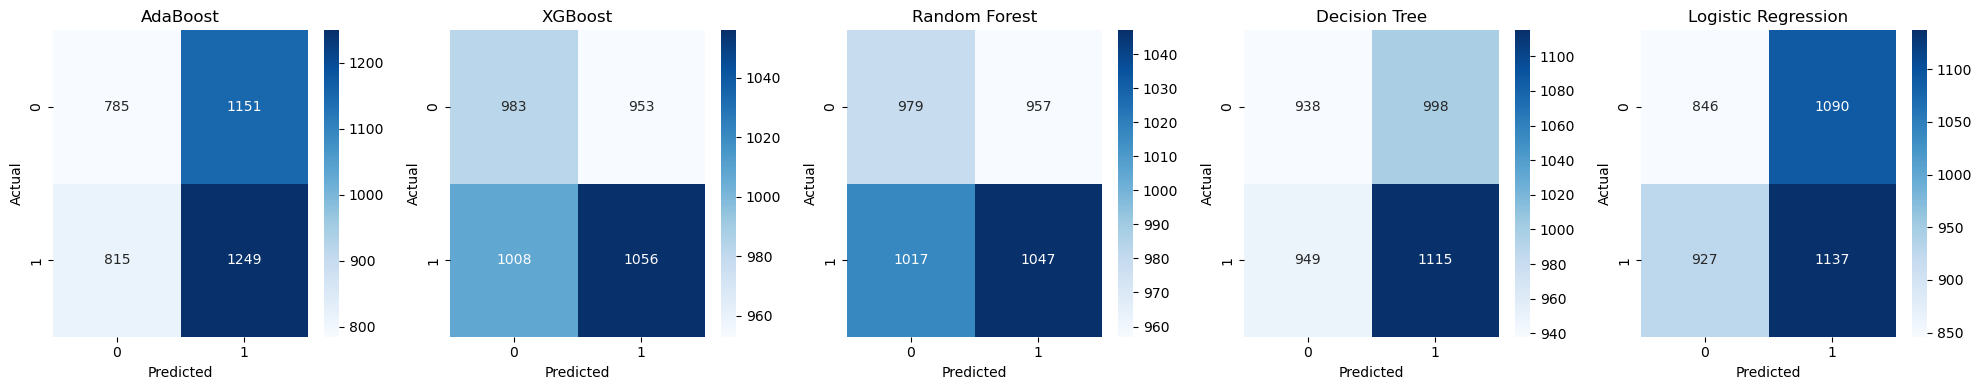

In [26]:
plot_confusion_matrices(models, x_test, y_test)